## Analysis of bikes trajectories

*Authors: Liubov.* 

Dataset was produced during the hackathon from CityLab Berlin (Alexandra).

Data description:
we have data for (3626252, 22) trips for 15252 individual bike IDs in Berlin. 


This work is inspired by the workshop https://github.com/technologiestiftung/bike-sharing and data shared by Citylab Berlin scientists. Thanks to Alexandra Kapp and Fabien for inspiration and data, code and ideas sharing.

One can do analysis similar to one which I did with other trajectories for mobility https://github.com/Liyubov/mobility_analysis
Work in progress. If you find errors, please let me know.

Here we analyze trajectories of bikes. Data are depersonalised and no privacy issues should rise from this pure research work.

References on other work and analysis of datasets:
    1. analysis of Velibs "Analysis of bike sharing system by clustering : the Vélib "
    2. analysis of bike sharing systems
    3. analysis of bike sharing data 
https://www.kaggle.com/marklvl/explanatory-data-analysis-on-bike-sharing-dataset



### Open research questions:

1. Can we infer human behavior and preferences from individual bike trajectory properties and ensemble of trajectories (how long they should be?)

2. Can we infer fluxes of people, e.g. using flow-networks measures and what are the main amenities on maps?
3. Do people move on bikes differently than with other transport? 
1. To plot probability density distributions of jumps vs. duration 
2. To plot distribution of final locations vs. starting locations 
3. To plot districts on a map https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac 
use mobility software for analysis https://scikit-mobility.github.io/scikit-mobility/reference/collective_measures.html

4. plot distribution of jump length vs. duration of jumps for bike;  plot latitude vs. longtitude popularity of places (per district);  apply flow-networks method to understand where people go (every day or every week)
    

    
## Particular research questions 
For this data I asked two main questions, which I thought could be interesting for further investigation:
1. Is the distribution of bike trip distances bimodal, trimodal?
(Note:
Additionally it is important to note that for some trips we also have not just origin-desination with the distance between the origin and destination points (O-D), but also the points in between. This information is available for some O-D point. At the same time for some O-D points it is possible to reconstruct the shortest paths using OSMnx shortest paths estimation.).
2. How this distribution is influenced by the underlying bike network? 
Hypothesis: Presumably, if we have centred bike network, then bimodality may be less distinct, since longer trips outside of 
the city may not nessarily be as long as they are in the model where bike stations are all centered.
What is the distribution of amenities for bike End points of trajectories?
3. How the distribution of amenities of destinations is influenced by the fact that bikes have fixed vs. non-fixed stations?

## Additional questions 
(Discussions with Fede and Luis on 29 November)
1. How to explain differences in distributions of lengths for bike systems with stations and without stations? Which role here do underlying bike networks play?
2. How amenities around destinations can influence distributions of lengths of trips, distributions of activities (time of the day), trip durations etc? What is statistics of amenities (third places)?
3. To which places non-stationary bikes give more access to?
4. How different is behaviour of other mobile vehicles e.g. scooter users and bike users? (scooters are more for tourism, bikes for people from the city) - is there open data on that?
5. General: what is optimal disribution of bikes and bikes stations in the city?

## Caclulate for project: 
(Liuba, Luis)
1. Distributions of drop-off places for stationary bikes vs. non-stationary bikes - plot on a map
2. Compare distributions of durations/distances for stationary vs. non-stationary bikes - improve plot from overleaf
3. Study distributions of trips as a function of types of amenities - make plot
find and categorise types of amenities e.g. here https://wiki.openstreetmap.org/wiki/Key:amenity
(idea: short trips are for different topics)



In [1]:
#import plotly.plotly as py
#import plotly.graph_objs as go
import pandas as pd
import csv


# load data on trajectories, it is very heavy 

df_traj = pd.read_csv('C:/Users/lyubo/Documents/DATA_networks/mobilitydata/bikes_sharing_data_technologiestiftung_berlin/trajectories_bikes_data_cleaned.csv')

print(df_traj.shape)



(3626252, 22)


In [2]:
df_traj.head(50)


,id,id.1,bikeId,providerId,timestamp,latitude,longitude,prev_id,next_id,prev_lat,...,next_lon,end_timestamp,mode,response,geometry,distance,calc_time,waypoints,duration,speed
0,1,1,13001,0,2019-04-05 08:20:04.689917,52.510327,13.405788,13001.0,13001.0,52.536506,...,13.405788,2019-04-05 13:44:04.154419,accessible,NaN,NaN,NaN,NaN,NaN,0 days 05:23:59.464502000,NaN
1,2,2,13001,0,2019-04-05 13:44:04.154419,52.510327,13.405788,13001.0,13001.0,52.510327,...,13.421259,2019-04-05 18:16:03.582939,trip,{'routes': [{'geometry': {'coordinates': [[13....,"{'coordinates': [[13.405853, 52.510328], [13.4...",3238.3,939.0,"[{'name': 'Neue Grünstraße', 'hint': 'OmIBgK6Q...",0 days 04:31:59.428520000,0.714356
2,3,3,13001,0,2019-04-05 18:16:03.582939,52.532190,13.421259,13001.0,13001.0,52.510327,...,13.421259,2019-04-05 18:20:04.351730,accessible,NaN,NaN,NaN,NaN,NaN,0 days 00:04:00.768791000,NaN
3,4,4,13001,0,2019-04-05 18:20:04.351730,52.532190,13.421259,13001.0,13001.0,52.532190,...,13.421317,2019-04-05 18:24:03.220242,accessible,NaN,NaN,NaN,NaN,NaN,0 days 00:03:58.868512000,NaN
4,5,5,13001,0,2019-04-05 18:24:03.220242,52.532183,13.421317,13001.0,13001.0,52.532190,...,13.421317,2019-04-06 12:48:04.815239,accessible,NaN,NaN,NaN,NaN,NaN,0 days 18:24:01.594997000,NaN
5,6,6,13001,0,2019-04-06 12:48:04.815239,52.532183,13.421317,13001.0,13001.0,52.532183,...,13.418194,2019-04-06 13:52:04.318176,trip,{'routes': [{'geometry': {'coordinates': [[13....,"{'coordinates': [[13.421322, 52.532191], [13.4...",516.4,180.8,"[{'name': 'Raabestraße', 'hint': '7kIAgPNCAICh...",0 days 01:03:59.502937000,0.484188
6,7,7,13001,0,2019-04-06 13:52:04.318176,52.529784,13.418194,13001.0,13001.0,52.532183,...,13.418194,2019-04-07 11:16:05.033710,accessible,NaN,NaN,NaN,NaN,NaN,0 days 21:24:00.715534000,NaN
7,8,8,13001,0,2019-04-07 11:16:05.033710,52.529784,13.418194,13001.0,13001.0,52.529784,...,13.398198,2019-04-07 11:40:05.615470,trip,{'routes': [{'geometry': {'coordinates': [[13....,"{'coordinates': [[13.418193, 52.529784], [13.4...",2388.2,643.3,"[{'name': 'Prenzlauer Allee', 'hint': 'mxYFgHo...",0 days 00:24:00.581760000,5.968089
8,9,9,13001,0,2019-04-07 11:40:05.615470,52.515599,13.398198,13001.0,13001.0,52.529784,...,13.398198,2019-04-07 12:08:04.375297,accessible,NaN,NaN,NaN,NaN,NaN,0 days 00:27:58.759827000,NaN
9,10,10,13001,0,2019-04-07 12:08:04.375297,52.515599,13.398198,13001.0,13001.0,52.515599,...,13.376464,2019-04-07 12:24:04.827844,trip,{'routes': [{'geometry': {'coordinates': [[13....,"{'coordinates': [[13.398264, 52.515487], [13.3...",1783.2,514.4,"[{'name': 'Werderscher Markt', 'hint': 'QFkAgP...",0 days 00:16:00.452547000,6.683849


In [6]:
print(df_traj.columns)

Index(['id', 'id.1', 'bikeId', 'providerId', 'timestamp', 'latitude',
       'longitude', 'prev_id', 'next_id', 'prev_lat', 'prev_lon', 'next_lat',
       'next_lon', 'end_timestamp', 'mode', 'response', 'geometry', 'distance',
       'calc_time', 'waypoints', 'duration', 'speed'],
      dtype='object')


In [2]:
print(df_traj.iloc[1])

id                                                               2
id.1                                                             2
bikeId                                                       13001
providerId                                                       0
timestamp                               2019-04-05 13:44:04.154419
latitude                                                   52.5103
longitude                                                  13.4058
prev_id                                                      13001
next_id                                                      13001
prev_lat                                                   52.5103
prev_lon                                                   13.4058
next_lat                                                   52.5322
next_lon                                                   13.4213
end_timestamp                           2019-04-05 18:16:03.582939
mode                                                          

In [7]:
df_traj.iloc[1].waypoints        

"[{'name': 'Neue Grünstraße', 'hint': 'OmIBgK6QBoA1AAAAHAAAAAAAAAAAAAAAyBCyQY2iNUEAAAAAAAAAADUAAAAcAAAAAAAAAAAAAAACAAAAnY7MAHg-IQNcjswAdz4hAwAAfxbksUxn', 'distance': 4.413215998895333, 'location': [13.405853, 52.510328]}, {'name': 'Raabestraße', 'hint': '7kIAgPNCAICJAQAAQwAAAAAAAAA0AwAAfnuDQjzcMUEAAAAAlgoJQ4kBAABDAAAAAAAAADQDAAACAAAA08rMAOuTIQPLyswA3pMhAwAA7wbksUxn', 'distance': 1.5451647214696673, 'location': [13.421267, 52.532203]}]"

## Distributions of lengths of bikes trips 
Spatial distribution properties. 
We first look at distribution of length between consequent jumps $|X(t),X(t+1)|$.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# find unique values in column bikeid
bike_ids = np.unique(df_traj.bikeId.values)
print('number of unique bike ids ', len(bike_ids))


provider_ids = np.unique(df_traj.providerId.values)
print('number of unique providers ids ', len(provider_ids))

def calc_jump_dist(Xarray,Yarray): #function to calculate distribution of steps  # given arrays Xarray, Yarray of trajectories
    dist = np.zeros(len(Xarray))
    for i in range(0, len(Xarray)-1):
        dist[i] = calc_dist(Xarray[i],Xarray[i+1],Yarray[i],Yarray[i+1])
    return dist
    
def calc_dist(x1,x2,y1,y2): #function to calculate distance between 2 points in 2D
    return np.sqrt((x1-x2)*(x1-x2)+(y1-y2)*(y1-y2))

def plot_dist(dist):
    plt.hist(dist, bins=20, alpha=0.2) # alpha is transparency parameter
    plt.xlabel('distance')
    plt.ylabel('frequency')
    plt.title('distribution of jump length for bike number '+str(bikeid))
    

def plot_dist_from_traj(df_id, bikeid):
    # assign values to coordinates
    X_tr = df_id.latitude.values
    Y_tr = df_id.longitude.values
    
    # now we apply this function to routes dataframe
    jumps_lengths = calc_jump_dist(X_tr,Y_tr)

    # now we are plotting the histogram 
    plt.hist(jumps_lengths, bins=20, alpha=0.2) # alpha is transparency parameter
    plt.xlabel('distance')
    plt.ylabel('frequency')
    plt.title('distribution of jump length for bike number '+str(bikeid))
    #ax.set_xscale('log')
    #plt.show()




number of unique bike ids  15252
number of unique providers ids  3


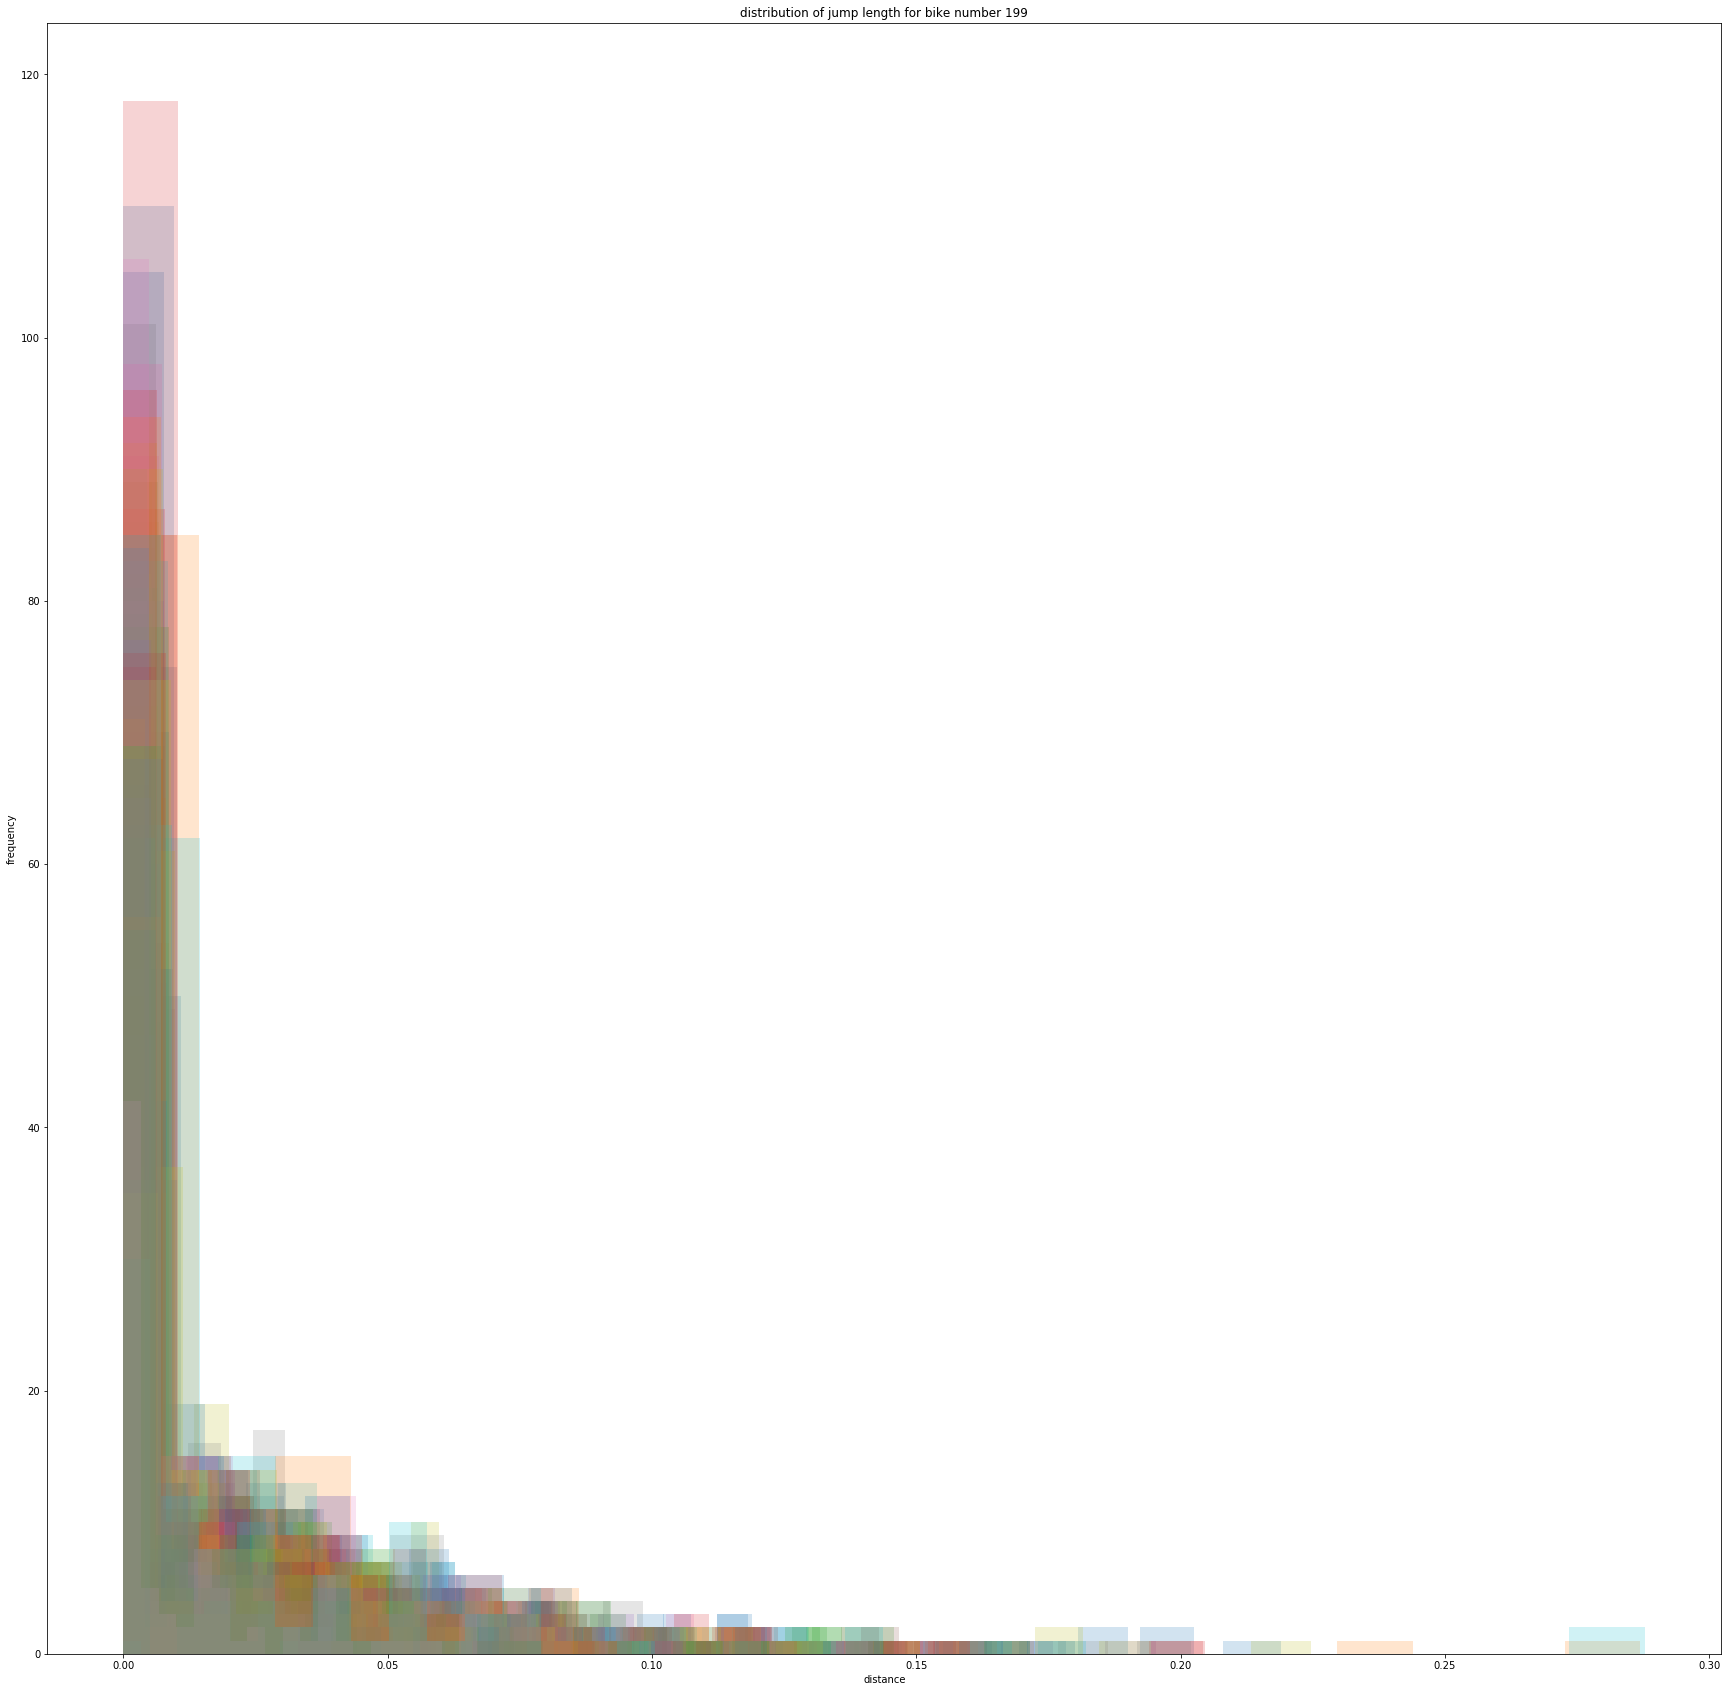

In [6]:
# loop through all bikeIds  
fig, ax = plt.subplots(figsize=(30, 30))
for ind_bikeid in range(0, 200): #len(bike_ids)): #5): 
    df_id = df_traj[df_traj.bikeId == bike_ids[ind_bikeid]]  #get bike with ID 
    plot_dist_from_traj(df_id, ind_bikeid)
#    ax.set_xscale('log')    
plt.show()    

# since each trip even for the same bike ID is made for different trip, we may want to get all distributions




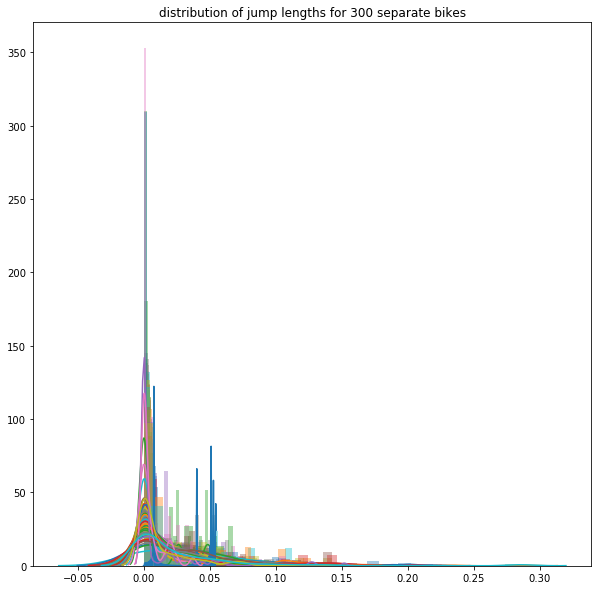

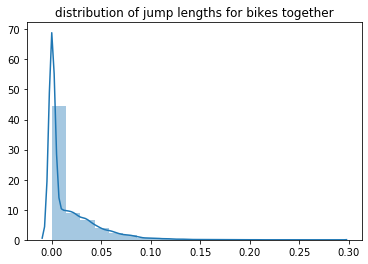

In [5]:
import seaborn


fig, ax = plt.subplots(figsize=(10, 10))

distr_all = []

for ind_bikeid in range(0, 100): #len(bike_ids)): #5): 
    df_id = df_traj[df_traj.bikeId == bike_ids[ind_bikeid]]  #get bike with ID 
    X_tr = df_id.latitude.values
    Y_tr = df_id.longitude.values
    
    # now we apply this function to routes dataframe
    jumps_lengths = calc_jump_dist(X_tr,Y_tr)

    distr_all= np.append(distr_all, jumps_lengths)
    seaborn.distplot(jumps_lengths, bins=20)
plt.title('distribution of jump lengths for 300 separate bikes')
plt.show()   

seaborn.distplot(distr_all, bins=20)
plt.title('distribution of jump lengths for bikes together')
plt.show()

In [ ]:

df_prov = df_traj[df_traj.providerId == 0]  #get dataframe from the first provider
X_tr = df_prov.latitude.values
Y_tr = df_prov.longitude.values
    
# now we apply this function to routes dataframe
jumps_lengths = calc_jump_dist(X_tr,Y_tr)

#    distr_all= np.append(distr_all, jumps_lengths)
seaborn.distplot(jumps_lengths, bins=20)
plt.title('distribution of jump lengths for bikes from 1st provider')
plt.show()  

In [ ]:
df_prov = df_traj[df_traj.providerId == 1]  #get dataframe from the first provider
X_tr = df_prov.latitude.values
Y_tr = df_prov.longitude.values
    
# now we apply this function to routes dataframe
jumps_lengths = calc_jump_dist(X_tr,Y_tr)

#    distr_all= np.append(distr_all, jumps_lengths)
seaborn.distplot(jumps_lengths, bins=20)
plt.title('distribution of jump lengths for bikes from 2nd provider')
plt.show()  


print(np.shape(distr_all))

# Function to plot the distribution of locations

In [4]:
def plot_dist_lat_lon(df_id): #ind_bikeid):
    # assign values to coordinates
    X_tr = df_id.latitude.values
    Y_tr = df_id.longitude.values
    
    plt.plot(X_tr)
    plt.plot(Y_tr)
    #return 



In [3]:
# loop through all bikIds  
for ind_bikeid in range(0, 200): #len(bike_ids)): #5): #
    df_id = df_traj[df_traj.bikeId == bike_ids[ind_bikeid]]
    plot_dist_lat_lon(df_id )#, ind_bikeid)
plt.show()  

NameError: name 'bike_ids' is not defined


### Plot trajectories of bikes on network of city

We use OSMNX module for plotting 

loading graph of city


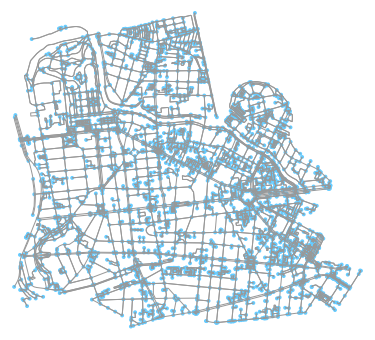

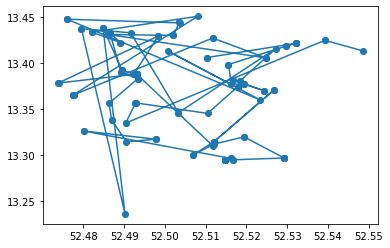

In [12]:
import json # requests for APIs
import requests #load Python code that allow us to work with the JSON data format and the HTTP protocol

import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

def plot_city(name_city_distr): 
    ''' given city district get information about schools there
    phone or email, 
    availability of data 
    format of name_city_distr "Kamppi, Helsinki, Finland"
    
    name_city_distr must be a shapely Polygon or MultiPolygon. If you requested graph from place name or address, make sure your query resolves to a Polygon or MultiPolygon, and not some other geometry, like a Point. See OSMnx documentation for details.
    '''
    
    place_name = name_city_distr # e.g. "Kamppi, Helsinki, Finland"
    
    # Fetch OSM street network from the location
    graph = ox.graph_from_place(place_name)
    type(graph)

    print('loading graph of city')

    # Plot the streets
    fig, ax = ox.plot_graph(graph)


    
# first we plot city map    
name_city = 'Charlottenburg, Berlin, Germany'

graph = ox.graph_from_place(name_city)
type(graph)
print('loading graph of city')
# Plot the streets
fig, ax = ox.plot_graph(graph)
#plot_city(name_city) 


# then we plot first trajectory on it
first_traj = df_traj[df_traj.bikeId == 13001]
#print(first_traj.shape)


# we can transfer latitude -> x, longitude -> y 
plt.plot(first_traj.latitude, first_traj.longitude, 'o-')
plt.show()


### TODO: embed trajectories in the city 


### Plot trajectories on a map
We plot trajectories on a geographical map.

In [4]:

import folium

#first we get trajectory datapoints from the file
df1 = df_traj[df_traj.bikeId == 13001]

latitude1 = df1.latitude.values
longitude1 = df1.longitude.values

#then we zip two arrays of lat, lon of datapoints
latlon1 = list(zip(latitude1, longitude1))
#print(latlon1)

#We put map to show first location of Berlin Latitude: 52.520008, longitude: 13.404954.


mapit = folium.Map( location=[52.7808 , 13.9772], zoom_start=6 )
for coord in latlon1:
    folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=8 ).add_to( mapit )
mapit


#draw connecting line between locations written in latlon file

'''
TODO:
to add information to nodes of the map with added info about cities; 
plot curved ages multigraph
'''

SAF=folium.PolyLine(locations=latlon1,weight=5,color = 'red')
mapit.add_child(SAF)





Index(['id', 'id.1', 'bikeId', 'providerId', 'timestamp', 'latitude',
       'longitude', 'prev_id', 'next_id', 'prev_lat', 'prev_lon', 'next_lat',
       'next_lon', 'end_timestamp', 'mode', 'response', 'geometry', 'distance',
       'calc_time', 'waypoints', 'duration', 'speed'],
      dtype='object')


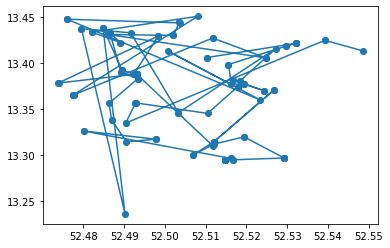

In [4]:
from matplotlib import pyplot as plt


#choose trajectory of the first bike

print(df_traj.columns)

first_traj = df_traj[df_traj.bikeId == 13001]
#print(first_traj.shape)


# we can transfer latitude -> x, longitude -> y 
plt.plot(first_traj.latitude, first_traj.longitude, 'o-')
plt.show()

number of unique bike ids  15252


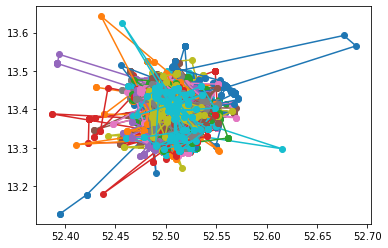

In [6]:
from matplotlib import pyplot as plt
import numpy as np

# find unique values in column bikeid
bike_ids = np.unique(df_traj.bikeId.values)
print('number of unique bike ids ', len(bike_ids))


#choose trajectory of bikes
#print(df_traj.columns)
for bike_ind in range(0, 100):#len(bike_ids)): 
    first_traj = df_traj[df_traj.bikeId == bike_ids[bike_ind]]
    plt.plot(first_traj.latitude, first_traj.longitude, 'o-')
plt.show()

### Observations
Bikes trajectories are clearly having some long sporadic jumps, which can be characterized by CTRW. (analysis below).




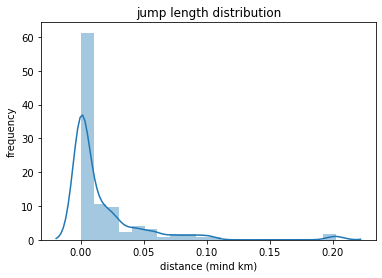

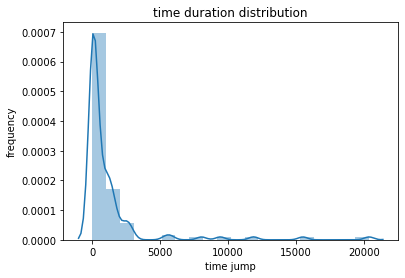

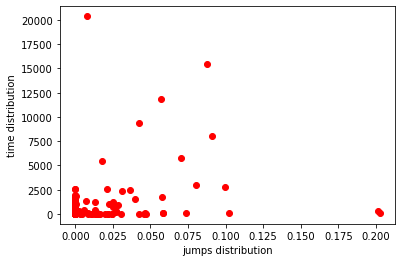

In [22]:

### First we calculate the distribution P(\delta) of jumps for the first trajectory
from matplotlib import pyplot as plt
import numpy as np
import seaborn

from datetime import datetime

fmt = '%Y-%m-%d %H:%M:%S'
tstamp1 = datetime.strptime('2016-04-06 21:26:27', fmt)
tstamp2 = datetime.strptime('2016-04-07 09:06:02', fmt)


def calc_jump_dist(Xarray,Yarray): #function to calculate distribution of steps  # given arrays Xarray, Yarray of trajectories
    dist = np.zeros(len(Xarray))
    for i in range(0, len(Xarray)-1):
        dist[i] = calc_dist(Xarray[i],Xarray[i+1],Yarray[i],Yarray[i+1])
    return dist
    
    
    
def calc_dist(x1,x2,y1,y2): #function to calculate distance between 2 points in 2D
    return np.sqrt((x1-x2)*(x1-x2)+(y1-y2)*(y1-y2))

def calc_time_dist(Tarray): #array of time stamps is given
    '''
    format 2019-04-05 13:44:04
    '''
    dist_time = np.zeros(len(Tarray))
    for ind in range(0, len(Tarray)-1):
        #print(pd.Timestamp.round(Tarray[ind+1]))
        time1 = pd.Timestamp(Tarray[ind+1])#datetime.strptime(Tarray[ind+1],fmt) # pd.Timestamp.round(Tarray[ind+1])-pd.Timestamp(Tarray[ind])
        time11 = time1.round(freq = 'T') 
        time2 = pd.Timestamp(Tarray[ind])#datetime.date_range(Tarray[ind+1],periods=1) # pd.Timestamp.round(Tarray[ind+1])-pd.Timestamp(Tarray[ind])
        time22 = time2.round(freq = 'T') 
        #print(type(time11))
        #print(time11 - time22)
        #print('time 1 ', time11)#(pd.date_range(Tarray[ind+1]) - pd.date_range(Tarray[ind]) )
        dist_time[ind]  = (pd.Timestamp(time1) - pd.Timestamp(time2))/np.timedelta64(1,'m')
    return dist_time


# then we plot first trajectory on it
first_traj = df_traj[df_traj.bikeId == 13001]

# assign values to x, y coordinates and time
# make sure that we get the right type of the data on both axis
X_tr = first_traj.latitude.values
Y_tr = first_traj.longitude.values
Time_tr = first_traj.timestamp.values


# now we apply this function to routes dataframe
jumps_distribution = calc_jump_dist(X_tr,Y_tr)
time_distribution = calc_time_dist(Time_tr)

# now we are plotting the distribution of jump lengths
seaborn.distplot(jumps_distribution, bins=20) #plt.hist(jumps_distribution, bins=20)
plt.title('jump length distribution')
plt.xlabel('distance (mind km)')
plt.ylabel('frequency')
#ax.set_xscale('log')
plt.show()


# now we are plotting the distribution of time vs. length
seaborn.distplot(time_distribution, bins=20) #plt.hist(time_distribution, bins=20)
plt.title('time duration distribution')
plt.xlabel('time jump')
plt.ylabel('frequency')
#ax.set_xscale('log')
plt.show()

plt.plot(jumps_distribution,time_distribution, 'ro')
plt.xlabel('jumps distribution')
plt.ylabel('time distribution')
plt.show()    
    

In [20]:
dr = pd.date_range('20130101 09:12:56.1234', periods=3)
dr.round('s')


DatetimeIndex(['2013-01-01 09:12:56', '2013-01-02 09:12:56',
               '2013-01-03 09:12:56'],
              dtype='datetime64[ns]', freq=None)

## Bikes distribution length per provider

Here we want to compare distribution of length of trips (for all bikes together) separately for all three providers. 

In [9]:


import numpy as np
from matplotlib import pyplot as plt



provider_ids = np.unique(df_traj.providerId.values)


df_prov_0 = df_traj[df_traj.providerId == 0]

# find unique values in column bikeid for that provider
bike_ids_0 = np.unique(df_prov_0.bikeId.values)
print('number of unique bike ids for 0 provider ', len(bike_ids_0))






number of unique bike ids for 0 provider  2375


In [13]:

df_prov_1 = df_traj[df_traj.providerId == 1]
# find unique values in column bikeid for that provider
bike_ids_1 = np.unique(df_prov_1.bikeId.values)
print('number of unique bike ids for 1 provider ', len(bike_ids_1))


number of unique bike ids for 1 provider  3595


In [15]:
df_prov_2 = df_traj[df_traj.providerId == 2]
# find unique values in column bikeid for that provider
bike_ids_2 = np.unique(df_prov_2.bikeId.values)
print('number of unique bike ids for 1 provider ', len(bike_ids_2))


number of unique bike ids for 1 provider  9282


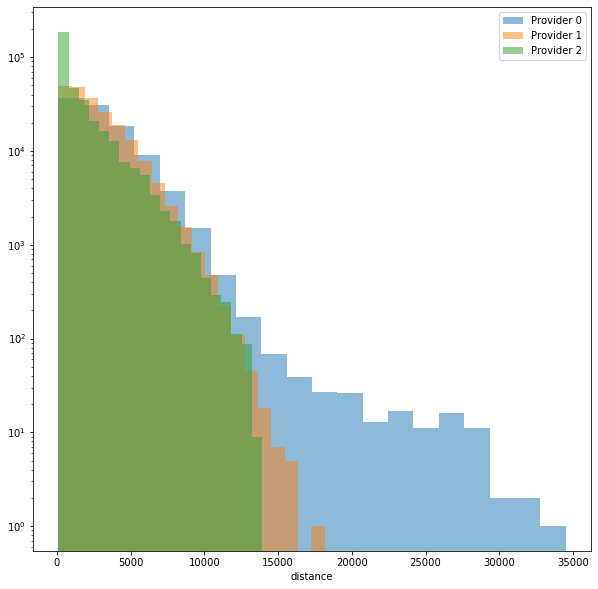

In [20]:

import math
import matplotlib.pyplot as plt

import seaborn


# now we apply this function to routes dataframe
#route_lengths = routes.apply(calc_dist, axis=1)

fig, ax = plt.subplots(figsize=(10, 10))
# now we are plotting the histogram 
plt.hist(df_prov_0.distance, bins=20, alpha =0.5)
plt.hist(df_prov_1.distance, bins=20, alpha =0.5)
plt.hist(df_prov_2.distance, bins=20, alpha =0.5)
ax.set_yscale('log')
plt.legend(['Provider 0', 'Provider 1', 'Provider 2']) #plt.legend(["Time window size"])
plt.xlabel('distance')
plt.show()






## Observations 
The distribution of distances for two providers have the same cutoff. 
While for the third provider we get the heavier tail of distribution. Note: the number of trips for these providers is different.



In [4]:

df_traj.head()


,id,id.1,bikeId,providerId,timestamp,latitude,longitude,prev_id,next_id,prev_lat,...,next_lon,end_timestamp,mode,response,geometry,distance,calc_time,waypoints,duration,speed
0,1,1,13001,0,2019-04-05 08:20:04.689917,52.510327,13.405788,13001.0,13001.0,52.536506,...,13.405788,2019-04-05 13:44:04.154419,accessible,NaN,NaN,NaN,NaN,NaN,0 days 05:23:59.464502000,NaN
1,2,2,13001,0,2019-04-05 13:44:04.154419,52.510327,13.405788,13001.0,13001.0,52.510327,...,13.421259,2019-04-05 18:16:03.582939,trip,{'routes': [{'geometry': {'coordinates': [[13....,"{'coordinates': [[13.405853, 52.510328], [13.4...",3238.3,939.0,"[{'name': 'Neue Grünstraße', 'hint': 'OmIBgK6Q...",0 days 04:31:59.428520000,0.714356
2,3,3,13001,0,2019-04-05 18:16:03.582939,52.532190,13.421259,13001.0,13001.0,52.510327,...,13.421259,2019-04-05 18:20:04.351730,accessible,NaN,NaN,NaN,NaN,NaN,0 days 00:04:00.768791000,NaN
3,4,4,13001,0,2019-04-05 18:20:04.351730,52.532190,13.421259,13001.0,13001.0,52.532190,...,13.421317,2019-04-05 18:24:03.220242,accessible,NaN,NaN,NaN,NaN,NaN,0 days 00:03:58.868512000,NaN
4,5,5,13001,0,2019-04-05 18:24:03.220242,52.532183,13.421317,13001.0,13001.0,52.532190,...,13.421317,2019-04-06 12:48:04.815239,accessible,NaN,NaN,NaN,NaN,NaN,0 days 18:24:01.594997000,NaN


In [5]:
df_traj.columns

Index(['id', 'id.1', 'bikeId', 'providerId', 'timestamp', 'latitude',
       'longitude', 'prev_id', 'next_id', 'prev_lat', 'prev_lon', 'next_lat',
       'next_lon', 'end_timestamp', 'mode', 'response', 'geometry', 'distance',
       'calc_time', 'waypoints', 'duration', 'speed'],
      dtype='object')

## Distribution of bike starts and drop-off on a map

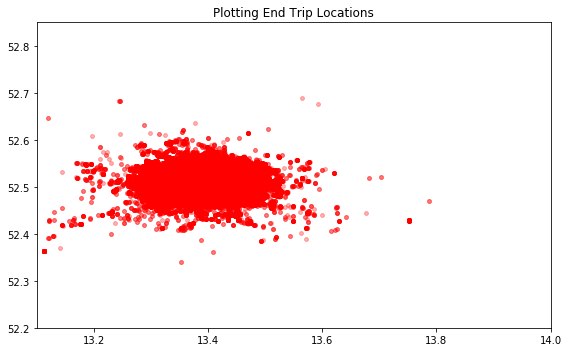

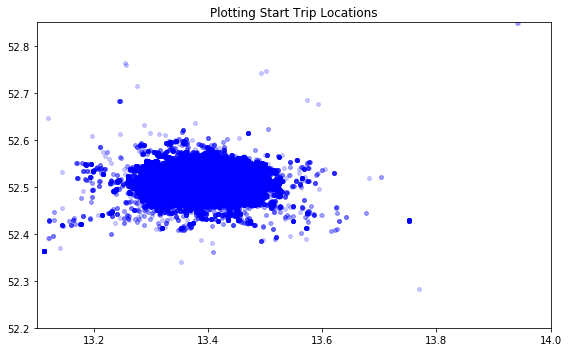

In [7]:
from datetime import datetime
from geopy.distance import geodesic
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

############# geographic locations of the trips ###################

BBox = (13.1,14.,52.2 , 52.85)# Berlin area location=[52.7808 , 13.9772],

# Berlin = plt.imread('cutimage.png')


def plot_positions_points(df, dflonstart, dflatstart, dflonstop, dflatstop):
    x_pos, y_pos = list(dflonstart), list(dflatstart)
    x_f,y_f = list(dflonstop), list(dflatstop)

    d_x = list(map(lambda x: x[0]-x[1], zip(x_f,x_pos)))
    d_y = list(map(lambda x: x[0]-x[1], zip(y_f,y_pos)))
    
    fig, ax = plt.subplots(figsize = (8,5))
    # ax.scatter(df.pick_long, df.pick_lat, zorder=2, alpha= 0.2, c='b', s=15)
    ax.scatter(dflonstop, dflatstop, zorder=1, alpha= 0.3, c='r', s=15)
    ax.set_title('Plotting End Trip Locations')
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    #ax.imshow(saclay, zorder=0, extent = BBox, aspect= 'equal')
    plt.tight_layout()
    #plt.savefig('end_points_trips.png')
    plt.show()


    fig, ax = plt.subplots(figsize = (8,5))
    ax.scatter(dflonstart, dflatstart, zorder=2, alpha= 0.2, c='b', s=15)
    # ax.scatter(df.drop_long, df.drop_lat, zorder=1, alpha= 0.3, c='r', s=15)
    ax.set_title('Plotting Start Trip Locations')
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    #ax.imshow(saclay, zorder=0, extent = BBox, aspect= 'equal')
    plt.tight_layout()
    #plt.savefig('start_points.png')
    plt.show()


    
dflonstart = df_traj.prev_lon
dflatstart = df_traj.prev_lat
dflonstop = df_traj.next_lon
dflatstop = df_traj.next_lat

plot_positions_points(df_traj, dflonstart, dflatstart, dflonstop, dflatstop)    
    
    


# Plot distribution in 3D

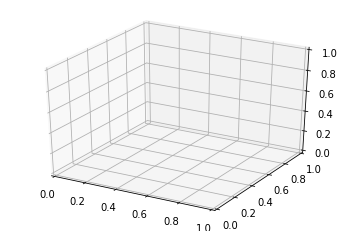

In [8]:
from mpl_toolkits import mplot3d
#Once this submodule is imported, a three-dimensional axes can be created by passing the keyword projection='3d' to any of the normal axes creation routines:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot difference of distributions of bikes end and start stations



In [ ]:


print(df_traj.shape)

x_pos, y_pos = list(df.longitudestart), list(df.latitudestart)
x_f,y_f = list(df.longitudestop), list(df.latitudestop)

d_x = list(map(lambda x: x[0]-x[1], zip(x_f,x_pos)))
d_y = list(map(lambda x: x[0]-x[1], zip(y_f,y_pos)))

fig, ax = plt.subplots(figsize = (8,5))
# ax.scatter(df.pick_long, df.pick_lat, zorder=2, alpha= 0.2, c='b', s=15)
ax.scatter(df.longitudestop, df.latitudestop, zorder=1, alpha= 0.3, c='r', s=15)
ax.set_title('Plotting End Trip Locations')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
#ax.imshow(saclay, zorder=0, extent = BBox, aspect= 'equal')
plt.tight_layout()
#plt.savefig('end_points_trips.png')
plt.show()


fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(df.longitudestart, df.latitudestart, zorder=2, alpha= 0.2, c='b', s=15)
# ax.scatter(df.drop_long, df.drop_lat, zorder=1, alpha= 0.3, c='r', s=15)
ax.set_title('Plotting Start Trip Locations')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
#ax.imshow(saclay, zorder=0, extent = BBox, aspect= 'equal')
plt.tight_layout()
#plt.savefig('start_points.png')
plt.show()
